# Airbnb Hotel Booking Analysis
**Dataset:** Airbnb_Open_Data.xlsx  
**Objectives:**
1. Booking Patterns - seasonality, lead times, locations
2. Pricing Strategies - pricing trends, seasonal effects, pricing vs. satisfaction
3. Guest Preferences - amenities/features, ratings, preferences by group
4. Host Performance - responsiveness, complaints, ratings, reviews

## 1. Import Libraries and Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from ipywidgets import interact, IntSlider
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [3]:
file_path = "attached_assets/1730285881-Airbnb_Open_Data.xlsx"
df = pd.read_excel(file_path)

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (102599, 26)

First few rows:


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


## 2. Data Exploration

In [4]:
print("Column names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
missing_summary = df.isnull().sum()
missing_pct = (missing_summary / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_summary,
    'Missing %': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

Column names:
['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']

Data types:
id                                         int64
NAME                                      object
host id                                    int64
host_identity_verified                    object
host name                                 object
neighbourhood group                       object
neighbourhood                             object
lat                                      float64
long                                     float64
country                                   object
country code                              object
instant_b

In [5]:
print("Detailed dataset information:")
df.info()

Detailed dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code              

## 3. Data Cleaning and Preprocessing

In [6]:
print("DATA CLEANING PROCESS")
df_clean = df.copy()

price_cols = [col for col in df_clean.columns if 'price' in col.lower()]
if price_cols:
    for price_col in price_cols:
        if df_clean[price_col].dtype == 'object':
            df_clean[price_col + '_clean'] = df_clean[price_col].astype(str).str.replace('$', '').str.replace(',', '')
            df_clean[price_col + '_clean'] = pd.to_numeric(df_clean[price_col + '_clean'], errors='coerce')
            df_clean[price_col + '_clean'] = df_clean[price_col + '_clean'].replace(0, np.nan)
            print(f"✓ Cleaned price column: {price_col}")

date_cols = [col for col in df_clean.columns if 'date' in col.lower() or 'last' in col.lower() or 'since' in col.lower()]
for date_col in date_cols:
    if df_clean[date_col].dtype == 'object':
        df_clean[date_col + '_parsed'] = pd.to_datetime(df_clean[date_col], errors='coerce')
        print(f"✓ Parsed date column: {date_col}")

rate_cols = [col for col in df_clean.columns if 'rate' in col.lower() or 'response' in col.lower()]
for rate_col in rate_cols:
    if df_clean[rate_col].dtype == 'object':
        df_clean[rate_col + '_clean'] = df_clean[rate_col].astype(str).str.replace('%', '')
        df_clean[rate_col + '_clean'] = pd.to_numeric(df_clean[rate_col + '_clean'], errors='coerce')
        print(f"✓ Cleaned rate column: {rate_col}")

numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if (df_clean[col] < 0).any():
        df_clean[col] = df_clean[col].apply(lambda x: np.nan if x < 0 else x)
        print(f"✓ Removed negative values from: {col}")

print(f"\nOriginal dataset size: {len(df)}")
print(f"Cleaned dataset size: {len(df_clean)}")
df = df_clean

DATA CLEANING PROCESS
✓ Removed negative values from: long
✓ Removed negative values from: minimum nights
✓ Removed negative values from: availability 365

Original dataset size: 102599
Cleaned dataset size: 102599


## 4. Objective 1: Booking Patterns Analysis
### Analyze seasonality, lead times, and location variations

### 4.1 Seasonality Analysis

In [7]:
date_columns = [col for col in df.columns if 'last review' in col.lower() or 'last_review' in col.lower()]
print("Date-related columns found:")
for col in date_columns:
    print(f"- {col}")
    if col in df.columns:
        print(f"  Sample values: {df[col].dropna().head(3).tolist()}")

Date-related columns found:
- last review
  Sample values: [Timestamp('2021-10-19 00:00:00'), Timestamp('2022-05-21 00:00:00'), Timestamp('2019-07-05 00:00:00')]


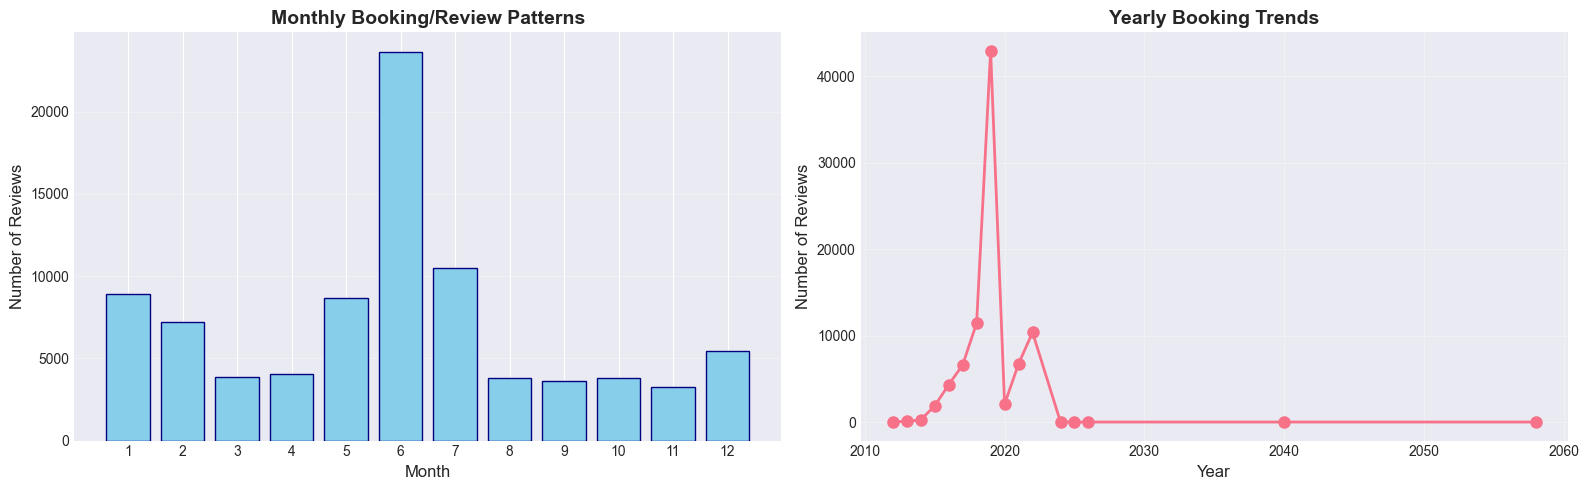


Peak booking months:
review_month
6.0    23634
7.0    10486
1.0     8909
Name: count, dtype: int64


In [8]:
if 'last review' in df.columns:
    df['last_review_date'] = pd.to_datetime(df['last review'], errors='coerce')
elif 'last review_parsed' in df.columns:
    df['last_review_date'] = df['last review_parsed']

if 'last_review_date' in df.columns:
    df['review_month'] = df['last_review_date'].dt.month
    df['review_year'] = df['last_review_date'].dt.year
    df['review_day_of_week'] = df['last_review_date'].dt.dayofweek
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    monthly_bookings = df['review_month'].value_counts().sort_index()
    axes[0].bar(monthly_bookings.index, monthly_bookings.values, color='skyblue', edgecolor='navy')
    axes[0].set_xlabel('Month', fontsize=12)
    axes[0].set_ylabel('Number of Reviews', fontsize=12)
    axes[0].set_title('Monthly Booking/Review Patterns', fontsize=14, fontweight='bold')
    axes[0].set_xticks(range(1, 13))
    axes[0].grid(axis='y', alpha=0.3)
    
    yearly_bookings = df['review_year'].value_counts().sort_index()
    axes[1].plot(yearly_bookings.index, yearly_bookings.values, marker='o', linewidth=2, markersize=8)
    axes[1].set_xlabel('Year', fontsize=12)
    axes[1].set_ylabel('Number of Reviews', fontsize=12)
    axes[1].set_title('Yearly Booking Trends', fontsize=14, fontweight='bold')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\nPeak booking months:")
    print(monthly_bookings.sort_values(ascending=False).head(3))

### 4.2 Lead Time Analysis

Searching for lead time or booking-stay date columns...
Lead time columns: []
Booking date columns: []
Check-in/Stay columns: []
Stay date columns: []

⚠ Note: Exact booking lead time data not available in dataset.
Using booking frequency proxy (reviews per month):


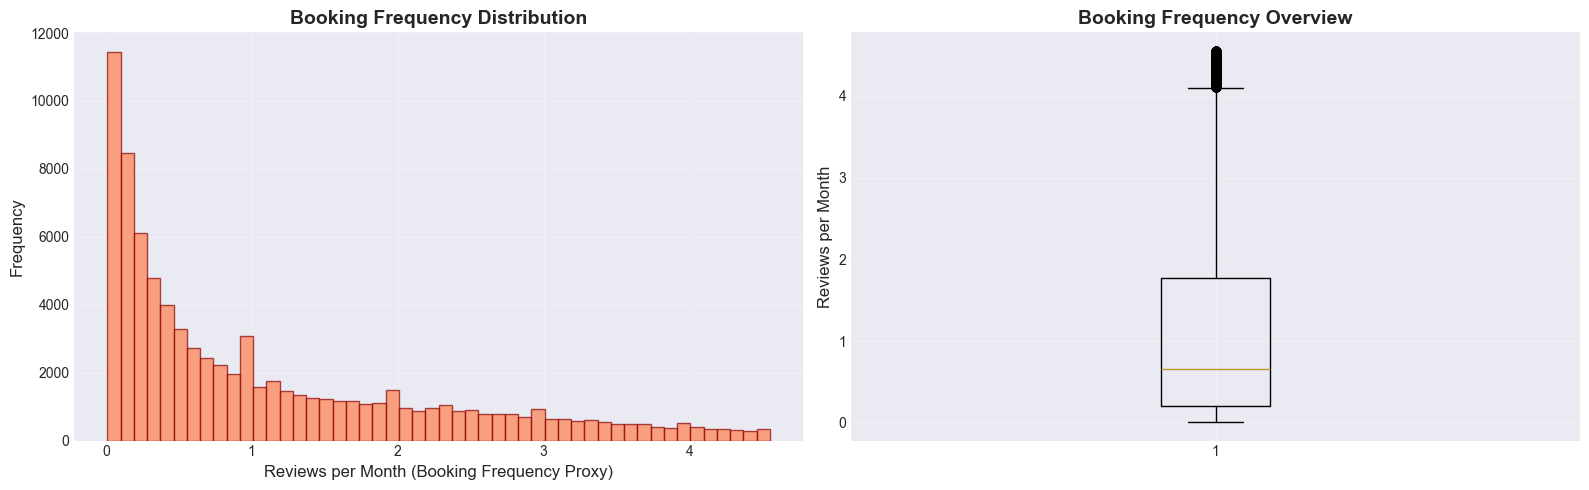


Booking Frequency Statistics (Proxy):
Average reviews per month: 1.37
Median reviews per month: 0.74

Note: Higher reviews per month indicates more frequent bookings.


In [9]:
lead_time_cols = [col for col in df.columns if 'lead' in col.lower() and 'time' in col.lower()]
booking_date_cols = [col for col in df.columns if 'booking' in col.lower() and 'date' in col.lower()]
checkin_cols = [col for col in df.columns if 'checkin' in col.lower() or 'check' in col.lower()]
stay_date_cols = [col for col in df.columns if 'stay' in col.lower() and 'date' in col.lower()]

print("Searching for lead time or booking-stay date columns...")
print(f"Lead time columns: {lead_time_cols}")
print(f"Booking date columns: {booking_date_cols}")
print(f"Check-in/Stay columns: {checkin_cols}")
print(f"Stay date columns: {stay_date_cols}")

lead_time_found = False

if lead_time_cols:
    lead_time_col = lead_time_cols[0]
    df['booking_lead_time_days'] = pd.to_numeric(df[lead_time_col], errors='coerce')
    lead_time_found = True
    print(f"\n✓ Using existing lead time column: {lead_time_col}")
    
elif booking_date_cols and (checkin_cols or stay_date_cols):
    booking_col = booking_date_cols[0]
    stay_col = checkin_cols[0] if checkin_cols else stay_date_cols[0]
    
    df['booking_date_parsed'] = pd.to_datetime(df[booking_col], errors='coerce')
    df['stay_date_parsed'] = pd.to_datetime(df[stay_col], errors='coerce')
    
    df['booking_lead_time_days'] = (df['stay_date_parsed'] - df['booking_date_parsed']).dt.days
    df['booking_lead_time_days'] = df['booking_lead_time_days'].apply(lambda x: x if x >= 0 else np.nan)
    lead_time_found = True
    print(f"\n✓ Calculated lead time from {booking_col} to {stay_col}")

if lead_time_found and 'booking_lead_time_days' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    lead_time_data = df['booking_lead_time_days'].dropna()
    lead_time_data = lead_time_data[lead_time_data <= lead_time_data.quantile(0.95)]
    
    axes[0].hist(lead_time_data, bins=50, color='coral', edgecolor='darkred', alpha=0.7)
    axes[0].set_xlabel('Lead Time (days)', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title('Booking Lead Time Distribution', fontsize=14, fontweight='bold')
    axes[0].grid(alpha=0.3)
    
    axes[1].boxplot(lead_time_data)
    axes[1].set_ylabel('Lead Time (days)', fontsize=12)
    axes[1].set_title('Lead Time Overview', fontsize=14, fontweight='bold')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\nBooking Lead Time Statistics:")
    print("(Time between booking and check-in/stay date)")
    print(df['booking_lead_time_days'].describe())
    print(f"\nMedian lead time: {df['booking_lead_time_days'].median():.1f} days")
    print(f"Average lead time: {df['booking_lead_time_days'].mean():.1f} days")
    
    if 'review_month' in df.columns:
        seasonal_lead = df.groupby('review_month')['booking_lead_time_days'].mean()
        print("\nSeasonal lead time variations:")
        print(seasonal_lead)
else:
    print("\n⚠ Note: Exact booking lead time data not available in dataset.")
    print("Using booking frequency proxy (reviews per month):")
    reviews_per_month_col = [col for col in df.columns if 'reviews' in col.lower() and 'month' in col.lower()]
    
    if reviews_per_month_col:
        rpm_col = reviews_per_month_col[0]
        
        fig, axes = plt.subplots(1, 2, figsize=(16, 5))
        
        rpm_data = df[rpm_col].dropna()
        rpm_data = rpm_data[rpm_data > 0]
        rpm_plot_data = rpm_data[rpm_data <= rpm_data.quantile(0.95)]
        
        axes[0].hist(rpm_plot_data, bins=50, color='coral', edgecolor='darkred', alpha=0.7)
        axes[0].set_xlabel('Reviews per Month (Booking Frequency Proxy)', fontsize=12)
        axes[0].set_ylabel('Frequency', fontsize=12)
        axes[0].set_title('Booking Frequency Distribution', fontsize=14, fontweight='bold')
        axes[0].grid(alpha=0.3)
        
        axes[1].boxplot(rpm_plot_data)
        axes[1].set_ylabel('Reviews per Month', fontsize=12)
        axes[1].set_title('Booking Frequency Overview', fontsize=14, fontweight='bold')
        axes[1].grid(alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print("\nBooking Frequency Statistics (Proxy):")
        print(f"Average reviews per month: {df[rpm_col].mean():.2f}")
        print(f"Median reviews per month: {df[rpm_col].median():.2f}")
        print("\nNote: Higher reviews per month indicates more frequent bookings.")
    else:
        print("\n⚠ No suitable lead time or booking frequency data found.")

### 4.3 Location Analysis

Location columns found:
['neighbourhood group', 'neighbourhood']


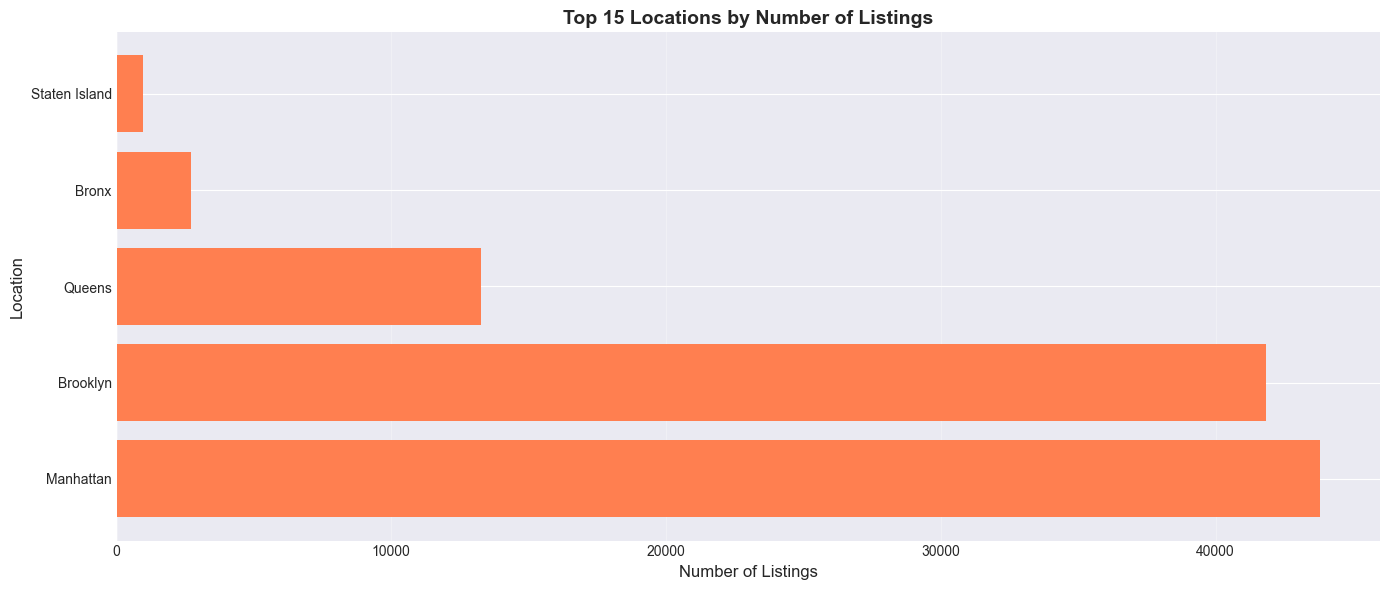


Top 5 locations based on neighbourhood group:
neighbourhood group
Manhattan        43793
Brooklyn         41843
Queens           13267
Bronx             2712
Staten Island      955
Name: count, dtype: int64


In [10]:
location_cols = [col for col in df.columns if any(x in col.lower() for x in ['neighbourhood', 'region', 'area', 'location', 'borough'])]
print("Location columns found:")
print(location_cols)

if location_cols:
    location_col = location_cols[0]
    top_locations = df[location_col].value_counts().head(15)
    
    plt.figure(figsize=(14, 6))
    plt.barh(range(len(top_locations)), top_locations.values, color='coral')
    plt.yticks(range(len(top_locations)), top_locations.index)
    plt.xlabel('Number of Listings', fontsize=12)
    plt.ylabel('Location', fontsize=12)
    plt.title('Top 15 Locations by Number of Listings', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nTop 5 locations based on {location_col}:")
    print(top_locations.head())

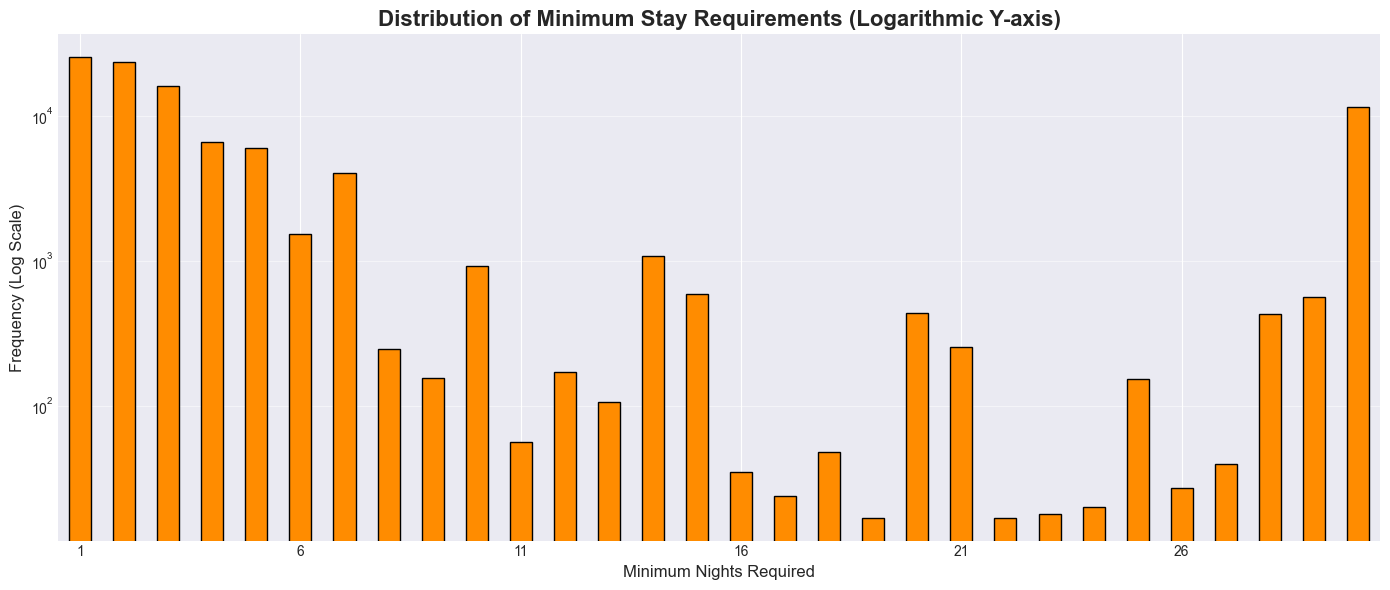


Minimum nights statistics (All Data):
count    102177.000000
mean          8.156219
std          30.279301
min           1.000000
25%           2.000000
50%           3.000000
75%           5.000000
max        5645.000000


In [11]:
if 'minimum nights' in df.columns:
    
    max_nights_for_plot = df['minimum nights'].quantile(0.95)
    
    night_counts = df[df['minimum nights'] <= max_nights_for_plot]['minimum nights'].value_counts().sort_index()
    
    plt.figure(figsize=(14, 6))
    
    night_counts.plot(kind='bar', color='darkorange', edgecolor='black')
    
    plt.yscale('log')
    
    plt.xlabel('Minimum Nights Required', fontsize=12)
    plt.ylabel('Frequency (Log Scale)', fontsize=12)
    plt.title('Distribution of Minimum Stay Requirements (Logarithmic Y-axis)', fontsize=16, fontweight='bold')
    
    if max_nights_for_plot > 20:
        plt.xticks([i - 1 for i in range(1, int(max_nights_for_plot) + 1, 5)], [str(i) for i in range(1, int(max_nights_for_plot) + 1, 5)], rotation=0)
    else:
        plt.xticks(rotation=0) 
        
    plt.grid(axis='y', alpha=0.5)
    plt.tight_layout()
    plt.show() 
    
    print("\nMinimum nights statistics (All Data):")
    print(df['minimum nights'].describe().to_string())

## 5. Objective 2: Pricing Strategies Analysis
### Examine pricing trends, seasonal effects, and price vs. satisfaction

In [12]:
price_col = [col for col in df.columns if 'price' in col.lower() and 'clean' in col.lower()]
if not price_col:
    price_col = [col for col in df.columns if 'price' in col.lower()]

print("Price columns found:")
print(price_col)

if price_col:
    price_column = price_col[0]
    
    if 'clean' not in price_column and df[price_column].dtype == 'object':
        df['price_clean'] = df[price_column].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
        df['price_clean'] = df['price_clean'].replace(0, np.nan)
    else:
        df['price_clean'] = df[price_column]
    
    print(f"\nPrice statistics for {price_column}:")
    print(df['price_clean'].describe())

Price columns found:
['price']

Price statistics for price:
count    102352.000000
mean        625.293536
std         331.671614
min          50.000000
25%         340.000000
50%         624.000000
75%         913.000000
max        1200.000000
Name: price_clean, dtype: float64


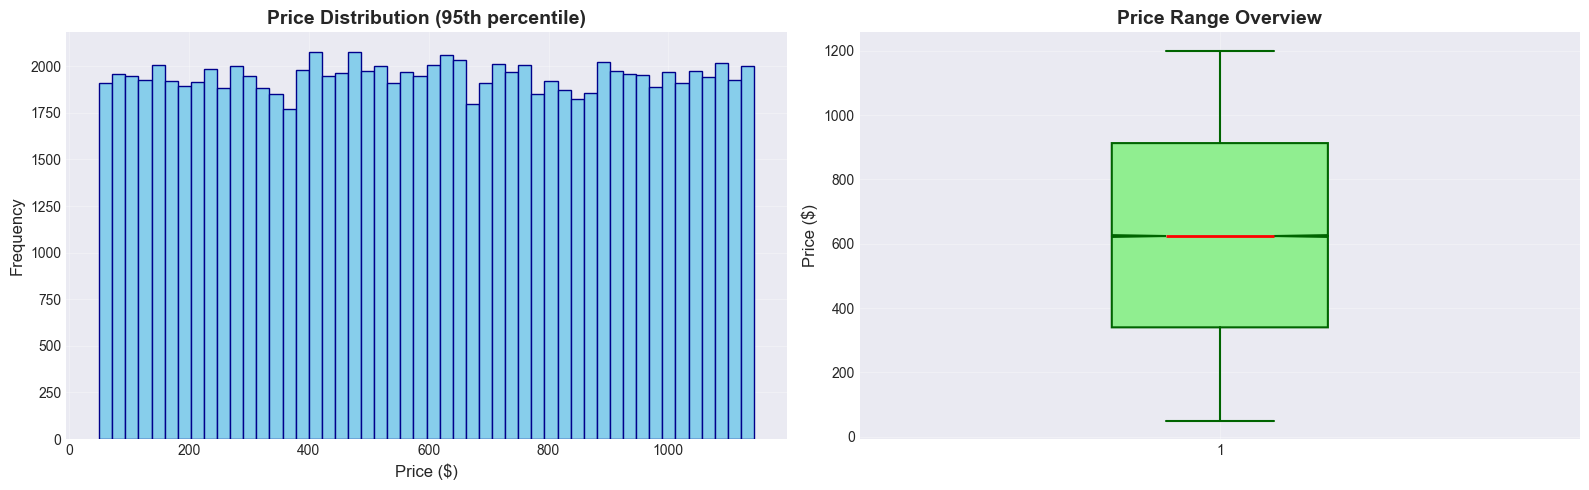

In [35]:
if 'price_clean' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    price_data = df['price_clean'].dropna()
    
    # Histogram: Filtered to 95th percentile, new colors
    axes[0].hist(price_data[price_data <= price_data.quantile(0.95)], bins=50, color='skyblue', edgecolor='darkblue')
    axes[0].set_xlabel('Price ($)', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title('Price Distribution (95th percentile)', fontsize=14, fontweight='bold')
    axes[0].grid(alpha=0.3)
    
    # Boxplot: Using entire dataset for overview, new styling
    boxplot_data = axes[1].boxplot(price_data, 
                                   patch_artist=True, # Fills the box with color
                                   notch=True,        # Adds notches for median confidence interval
                                   widths=0.3,        # Controls the width of the box
                                   flierprops=dict(marker='o', markerfacecolor='darkgreen', markersize=5, linestyle='none', markeredgecolor='darkgreen'), # Outlier styling
                                   medianprops=dict(color='red', linewidth=2), # Median line color
                                   boxprops=dict(facecolor='lightgreen', edgecolor='darkgreen', linewidth=1.5), # Box color
                                   whiskerprops=dict(color='darkgreen', linewidth=1.5), # Whisker color
                                   capprops=dict(color='darkgreen', linewidth=1.5) # Cap color
                                  )
    axes[1].set_ylabel('Price ($)', fontsize=12)
    axes[1].set_title('Price Range Overview', fontsize=14, fontweight='bold')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()


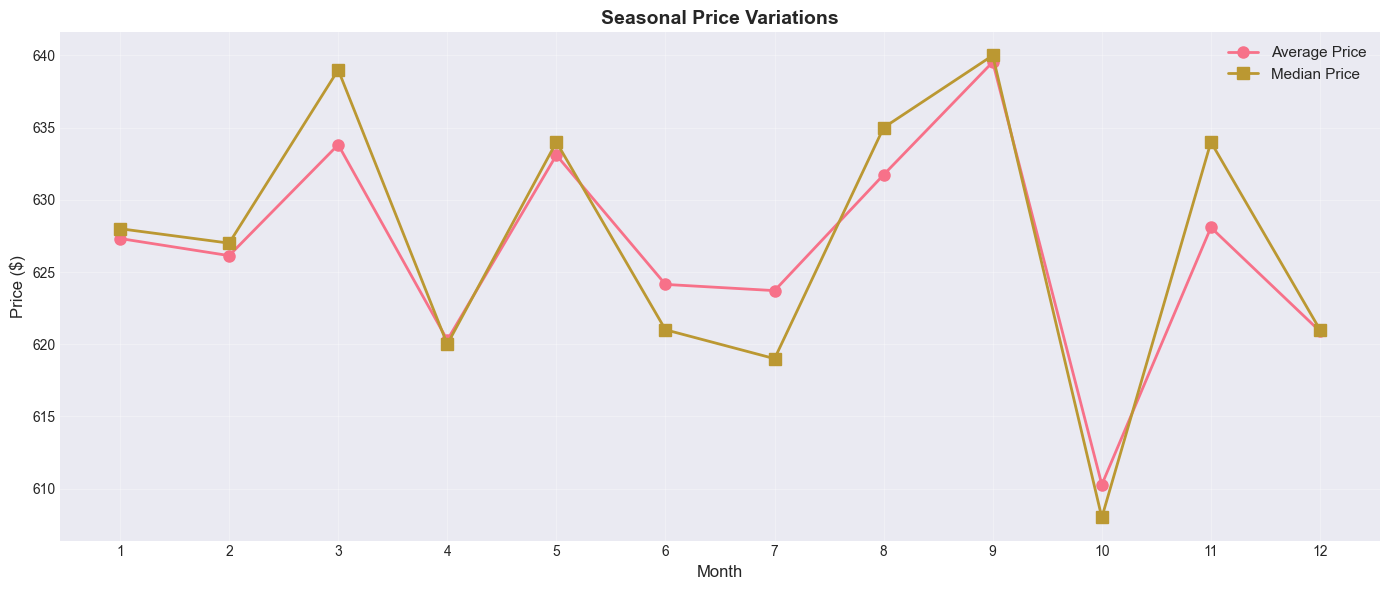


Seasonal pricing summary:
    review_month        mean  median  count
0            1.0  627.320126   628.0   8884
1            2.0  626.135737   627.0   7183
2            3.0  633.816475   639.0   3836
3            4.0  620.290950   620.0   4011
4            5.0  633.095420   634.0   8625
5            6.0  624.142058   621.0  23589
6            7.0  623.711610   619.0  10465
7            8.0  631.738253   635.0   3767
8            9.0  639.542904   640.0   3636
9           10.0  610.276685   608.0   3813
10          11.0  628.085723   634.0   3243
11          12.0  620.890116   621.0   5433


In [14]:
if 'price_clean' in df.columns and 'review_month' in df.columns:
    seasonal_prices = df.groupby('review_month')['price_clean'].agg(['mean', 'median', 'count']).reset_index()
    
    plt.figure(figsize=(14, 6))
    plt.plot(seasonal_prices['review_month'], seasonal_prices['mean'], marker='o', linewidth=2, label='Average Price', markersize=8)
    plt.plot(seasonal_prices['review_month'], seasonal_prices['median'], marker='s', linewidth=2, label='Median Price', markersize=8)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Price ($)', fontsize=12)
    plt.title('Seasonal Price Variations', fontsize=14, fontweight='bold')
    plt.xticks(range(1, 13))
    plt.legend(fontsize=11)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\nSeasonal pricing summary:")
    print(seasonal_prices)

In [15]:
rating_cols = [col for col in df.columns if 'rating' in col.lower() or ('review' in col.lower() and 'score' in col.lower())]
print("Rating columns found:")
print(rating_cols)

if 'price_clean' in df.columns and rating_cols:
    for rating_col in rating_cols[:2]:
        if df[rating_col].dtype in ['int64', 'float64']:
            plt.figure(figsize=(12, 6))
            valid_data = df[['price_clean', rating_col]].dropna()
            valid_data = valid_data[valid_data['price_clean'] <= valid_data['price_clean'].quantile(0.95)]
            
            plt.scatter(valid_data['price_clean'], valid_data[rating_col], alpha=0.3, s=30)
            
            z = np.polyfit(valid_data['price_clean'], valid_data[rating_col], 1)
            p = np.poly1d(z)
            plt.plot(valid_data['price_clean'].sort_values(), p(valid_data['price_clean'].sort_values()), 
                    "r--", linewidth=2, label='Trend line')
            
            plt.xlabel('Price ($)', fontsize=12)
            plt.ylabel(rating_col, fontsize=12)
            plt.title(f'Price vs. {rating_col}', fontsize=14, fontweight='bold')
            plt.legend()
            plt.grid(alpha=0.3)
            plt.tight_layout()
            plt.show()
            
            correlation = valid_data['price_clean'].corr(valid_data[rating_col])
            print(f"\nCorrelation between price and {rating_col}: {correlation:.3f}")
            break

Rating columns found:
[]


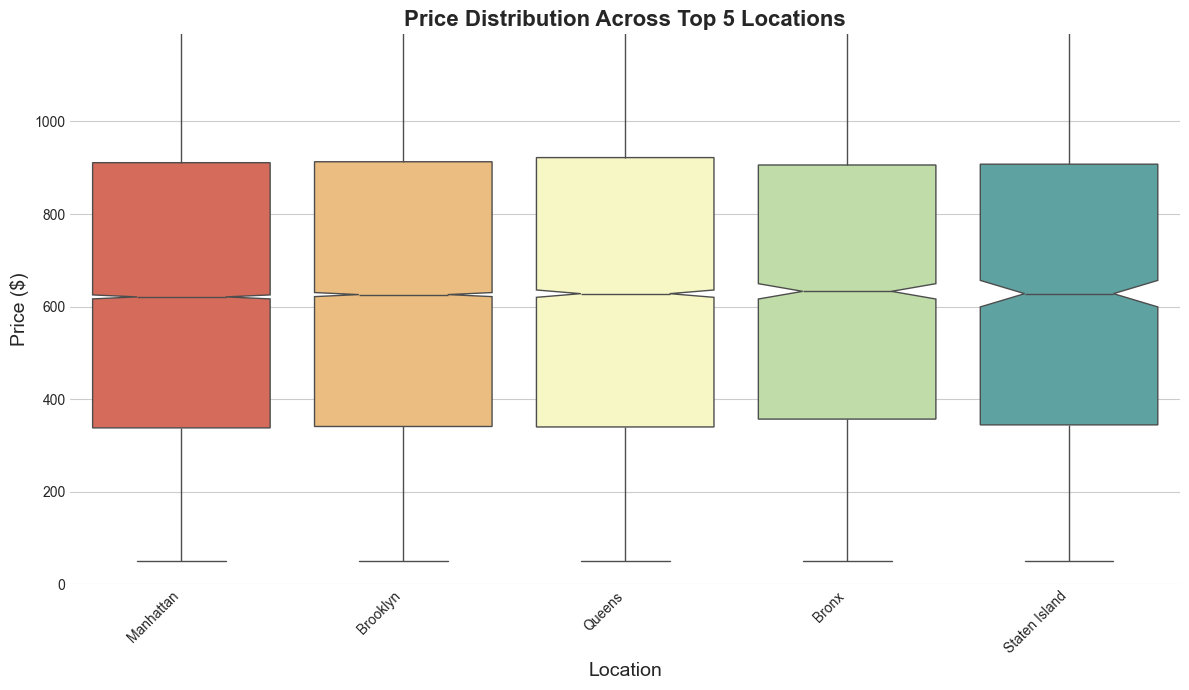


Top 5 locations by average price:
neighbourhood group
Queens           630.207647
Bronx            627.766359
Brooklyn         626.561078
Staten Island    624.490546
Manhattan        622.436508
Name: price_clean, dtype: float64


In [41]:
if 'price_clean' in df.columns and location_cols:
    location_col = location_cols[0]
    
    top_10_locations = df[location_col].value_counts().head(10).index
    
    location_price_data = df[df[location_col].isin(top_10_locations)].copy()
    
    y_limit = location_price_data['price_clean'].quantile(0.99)

    plt.figure(figsize=(12, 7))
    sns.set_style("whitegrid")
    
    sns.boxplot(
        x=location_col, 
        y='price_clean', 
        data=location_price_data,
        order=top_10_locations,
        palette="Spectral",
        notch=True
    )
    
    plt.title(
        f'Price Distribution Across Top {len(top_10_locations)} Locations', 
        fontsize=16, 
        fontweight='bold'
    )
    plt.ylabel('Price ($)', fontsize=14)
    plt.xlabel('Location', fontsize=14)
    plt.ylim(0, y_limit)
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    avg_price_by_location = df.groupby(location_col)['price_clean'].mean().sort_values(ascending=False).head(10)
    print("\nTop 5 locations by average price:")
    print(avg_price_by_location)

else:
    print("Required columns ('price_clean' or 'location_cols') not found.")

## 6. Objective 3: Guest Preferences Analysis
### Analyze amenities, features, ratings, and preferences by group

Room type columns found:
['room type']


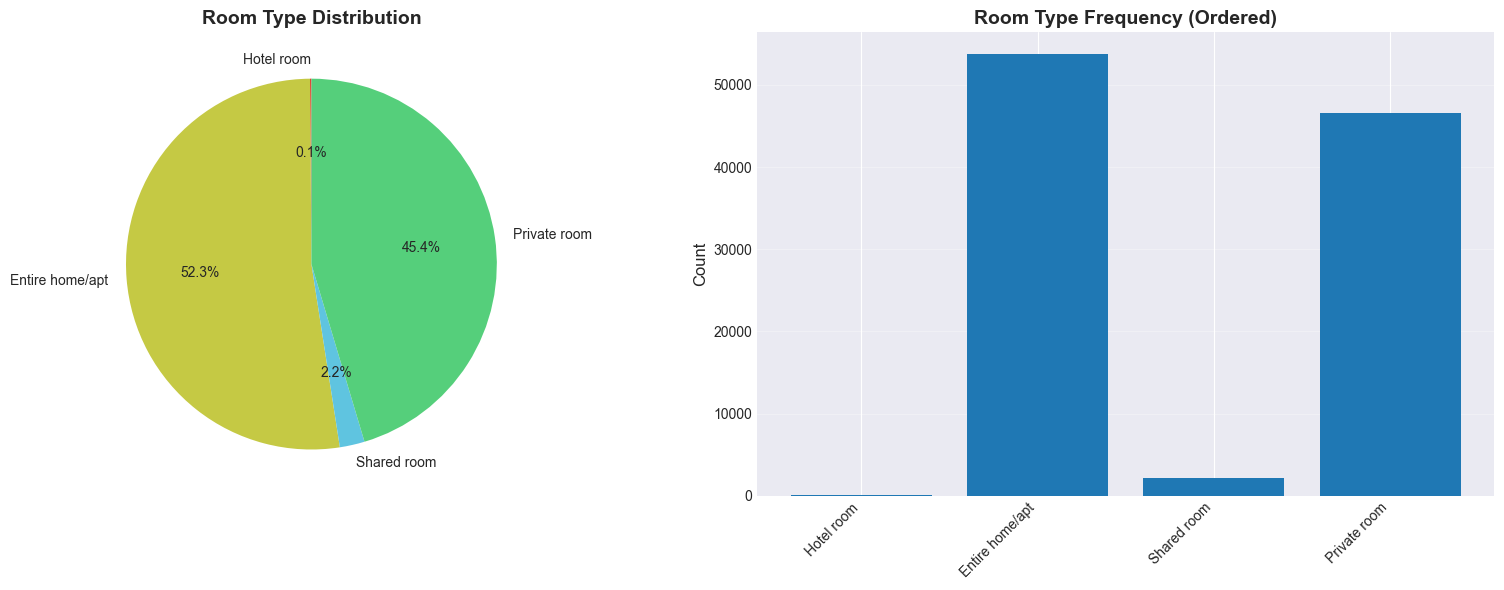


Room type preferences:
room type
Entire home/apt    53701
Private room       46556
Shared room         2226
Hotel room           116
Name: count, dtype: int64


In [36]:
room_type_col = [col for col in df.columns if 'room' in col.lower() and 'type' in col.lower()]
print("Room type columns found:")
print(room_type_col)

if room_type_col:
    room_col = room_type_col[0]
    room_distribution = df[room_col].value_counts()
    
    custom_order = ['Hotel room', 'Entire home/apt', 'Shared room', 'Private room']
    room_distribution_ordered = room_distribution.reindex(custom_order).dropna()
    
    pie_colors = ['#E31A1C', "#C5C944", "#5FC4E0", "#55CF7B"]
    bar_color = '#1F78B4' 
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    axes[0].pie(
        room_distribution_ordered.values, 
        labels=room_distribution_ordered.index, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=pie_colors
    )
    axes[0].set_title('Room Type Distribution', fontsize=14, fontweight='bold')
    
    axes[1].bar(range(len(room_distribution_ordered)), room_distribution_ordered.values, color=bar_color)
    axes[1].set_xticks(range(len(room_distribution_ordered)))
    axes[1].set_xticklabels(room_distribution_ordered.index, rotation=45, ha='right')
    axes[1].set_ylabel('Count', fontsize=12)
    axes[1].set_title('Room Type Frequency (Ordered)', fontsize=14, fontweight='bold')
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("\nRoom type preferences:")
    print(room_distribution)

Review count columns found:
['number of reviews', 'review rate number']


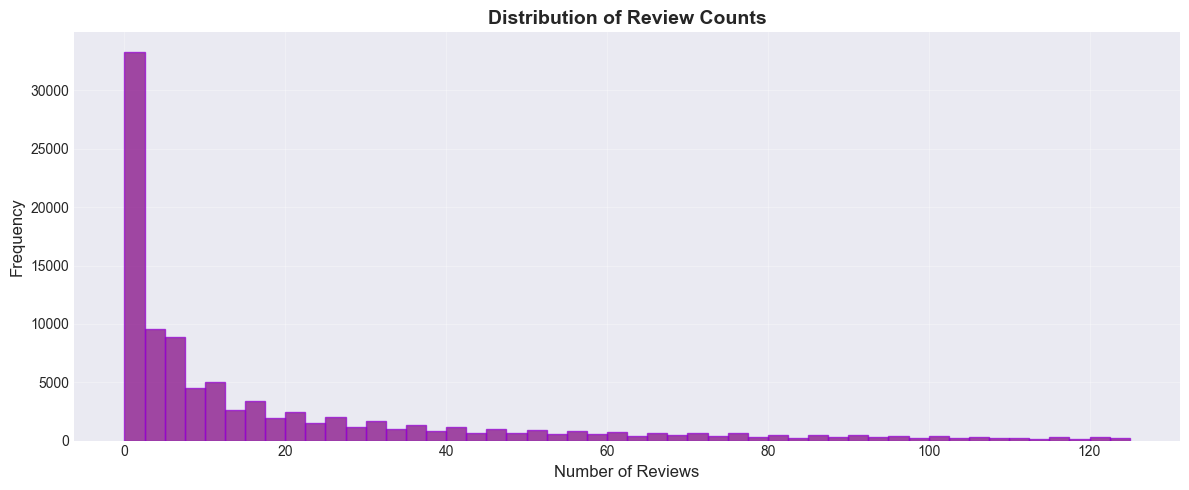


Review count statistics:
count    102416.000000
mean         27.483743
std          49.508954
min           0.000000
25%           1.000000
50%           7.000000
75%          30.000000
max        1024.000000
Name: number of reviews, dtype: float64


In [18]:
review_num_col = [col for col in df.columns if 'number' in col.lower() and 'review' in col.lower()]
print("Review count columns found:")
print(review_num_col)

if review_num_col:
    review_col = review_num_col[0]
    
    plt.figure(figsize=(12, 5))
    review_data = df[review_col].dropna()
    review_data = review_data[review_data <= review_data.quantile(0.95)]
    plt.hist(review_data, bins=50, color='purple', edgecolor='darkviolet', alpha=0.7)
    plt.xlabel('Number of Reviews', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Distribution of Review Counts', fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nReview count statistics:")
    print(df[review_col].describe())

In [19]:
if rating_cols and room_type_col:
    room_col = room_type_col[0]
    
    for rating_col in rating_cols[:1]:
        if df[rating_col].dtype in ['int64', 'float64']:
            rating_by_room = df.groupby(room_col)[rating_col].mean().sort_values(ascending=False)
            
            plt.figure(figsize=(12, 6))
            plt.bar(range(len(rating_by_room)), rating_by_room.values, color='salmon')
            plt.xticks(range(len(rating_by_room)), rating_by_room.index, rotation=45, ha='right')
            plt.ylabel(f'Average {rating_col}', fontsize=12)
            plt.xlabel('Room Type', fontsize=12)
            plt.title(f'Average {rating_col} by Room Type', fontsize=14, fontweight='bold')
            plt.grid(axis='y', alpha=0.3)
            plt.tight_layout()
            plt.show()
            
            print(f"\nAverage {rating_col} by room type:")
            print(rating_by_room)
            break

Availability columns found:
['availability 365']


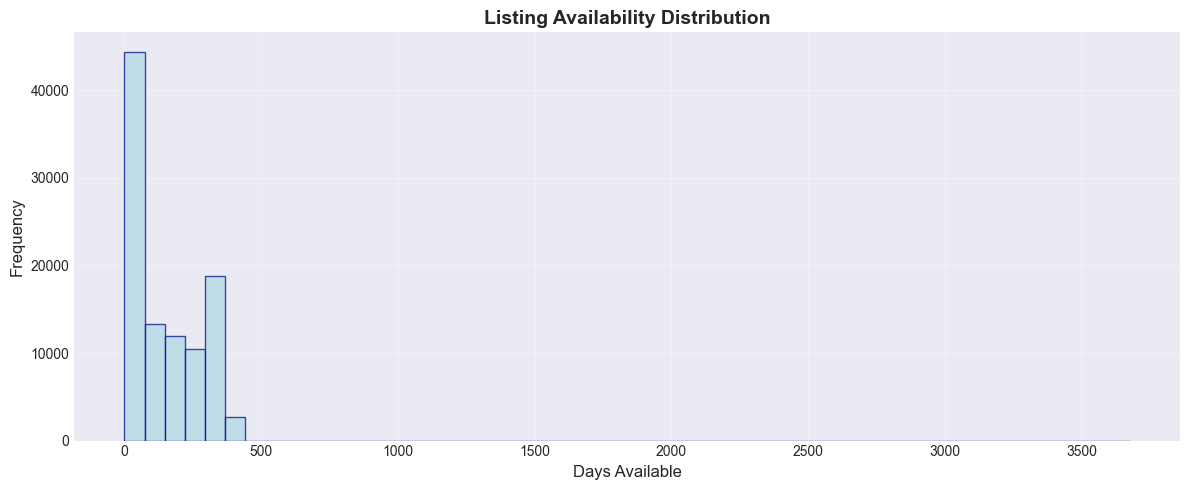


availability 365 statistics:
count    101719.000000
mean        141.755759
std         135.384196
min           0.000000
25%           4.000000
50%          98.000000
75%         269.000000
max        3677.000000
Name: availability 365, dtype: float64


In [20]:
availability_col = [col for col in df.columns if 'availability' in col.lower()]
print("Availability columns found:")
print(availability_col)

if availability_col:
    avail_col = availability_col[0]
    
    plt.figure(figsize=(12, 5))
    avail_data = df[avail_col].dropna()
    plt.hist(avail_data, bins=50, color='lightblue', edgecolor='navy', alpha=0.7)
    plt.xlabel('Days Available', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Listing Availability Distribution', fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\n{avail_col} statistics:")
    print(df[avail_col].describe())

## 7. Objective 4: Host Performance Analysis
### Analyze host responsiveness, complaints, ratings, and reviews

### 7.1 Host Responsiveness Analysis

In [21]:
host_cols = [col for col in df.columns if 'host' in col.lower()]
print("Host-related columns found:")
for col in host_cols:
    print(f"- {col}")

Host-related columns found:
- host id
- host_identity_verified
- host name
- calculated host listings count


In [22]:
response_rate_cols = [col for col in df.columns if 'response' in col.lower() and 'rate' in col.lower()]
print("\nHost response rate columns found:", response_rate_cols)

if response_rate_cols:
    for resp_col in response_rate_cols:
        if 'clean' in resp_col:
            response_col = resp_col
        elif df[resp_col].dtype in ['int64', 'float64']:
            response_col = resp_col
        else:
            response_col = resp_col + '_clean' if resp_col + '_clean' in df.columns else resp_col
        
        if response_col in df.columns:
            fig, axes = plt.subplots(1, 2, figsize=(16, 5))
            
            response_data = df[response_col].dropna()
            
            axes[0].hist(response_data, bins=30, color='mediumseagreen', edgecolor='darkgreen', alpha=0.7)
            axes[0].set_xlabel('Response Rate (%)', fontsize=12)
            axes[0].set_ylabel('Frequency', fontsize=12)
            axes[0].set_title('Host Response Rate Distribution', fontsize=14, fontweight='bold')
            axes[0].grid(alpha=0.3)
            
            axes[1].boxplot(response_data)
            axes[1].set_ylabel('Response Rate (%)', fontsize=12)
            axes[1].set_title('Response Rate Overview', fontsize=14, fontweight='bold')
            axes[1].grid(alpha=0.3)
            
            plt.tight_layout()
            plt.show()
            
            print(f"\nHost Response Rate Statistics:")
            print(df[response_col].describe())
            print(f"\nPercentage of hosts with >90% response rate: {((df[response_col] > 90).sum() / len(df[response_col].dropna()) * 100):.1f}%")
            break


Host response rate columns found: []


In [23]:
acceptance_rate_cols = [col for col in df.columns if 'acceptance' in col.lower()]
print("Host acceptance rate columns found:", acceptance_rate_cols)

if acceptance_rate_cols:
    for accept_col in acceptance_rate_cols:
        if 'clean' in accept_col:
            acceptance_col = accept_col
        elif df[accept_col].dtype in ['int64', 'float64']:
            acceptance_col = accept_col
        else:
            acceptance_col = accept_col + '_clean' if accept_col + '_clean' in df.columns else accept_col
        
        if acceptance_col in df.columns:
            plt.figure(figsize=(12, 5))
            acceptance_data = df[acceptance_col].dropna()
            
            plt.hist(acceptance_data, bins=30, color='skyblue', edgecolor='navy', alpha=0.7)
            plt.xlabel('Acceptance Rate (%)', fontsize=12)
            plt.ylabel('Frequency', fontsize=12)
            plt.title('Host Acceptance Rate Distribution', fontsize=14, fontweight='bold')
            plt.grid(alpha=0.3)
            plt.tight_layout()
            plt.show()
            
            print(f"\nHost Acceptance Rate Statistics:")
            print(df[acceptance_col].describe())
            break

Host acceptance rate columns found: []


### 7.2 Host Listings and Performance

Host listings columns:
['calculated host listings count']


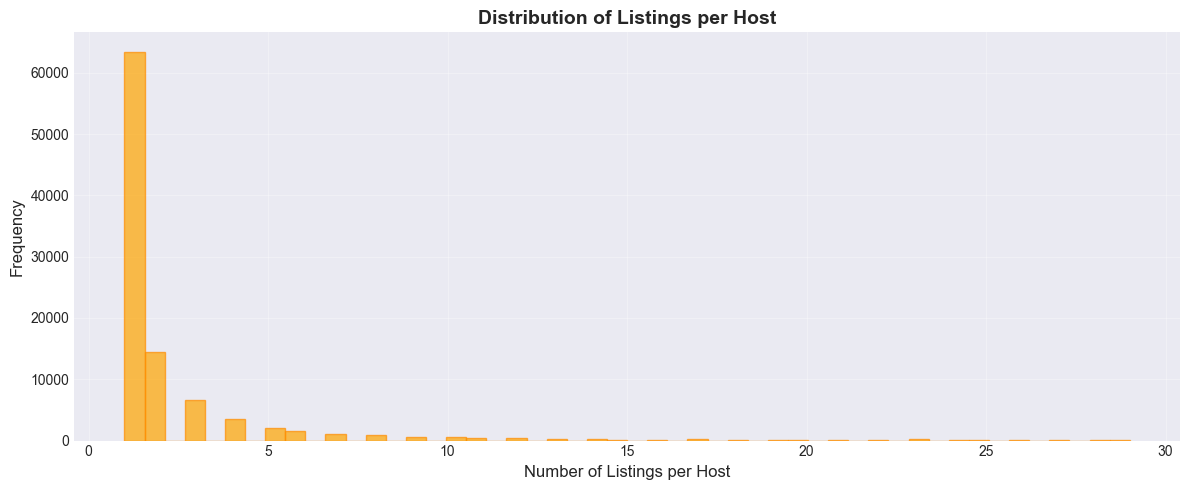


calculated host listings count statistics:
count    102280.000000
mean          7.936605
std          32.218780
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         332.000000
Name: calculated host listings count, dtype: float64

Single-listing vs Multi-listing hosts:
Single-listing hosts: 63429
Multi-listing hosts: 39170


In [24]:
host_listings_col = [col for col in host_cols if 'listing' in col.lower() or 'calculated' in col.lower()]
print("Host listings columns:")
print(host_listings_col)

if host_listings_col:
    listings_col = host_listings_col[0]
    
    plt.figure(figsize=(12, 5))
    listings_data = df[listings_col].dropna()
    listings_data = listings_data[listings_data <= listings_data.quantile(0.95)]
    plt.hist(listings_data, bins=50, color='orange', edgecolor='darkorange', alpha=0.7)
    plt.xlabel('Number of Listings per Host', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title('Distribution of Listings per Host', fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\n{listings_col} statistics:")
    print(df[listings_col].describe())
    
    single_vs_multi = (df[listings_col] == 1).value_counts()
    print("\nSingle-listing vs Multi-listing hosts:")
    print(f"Single-listing hosts: {single_vs_multi.get(True, 0)}")
    print(f"Multi-listing hosts: {single_vs_multi.get(False, 0)}")

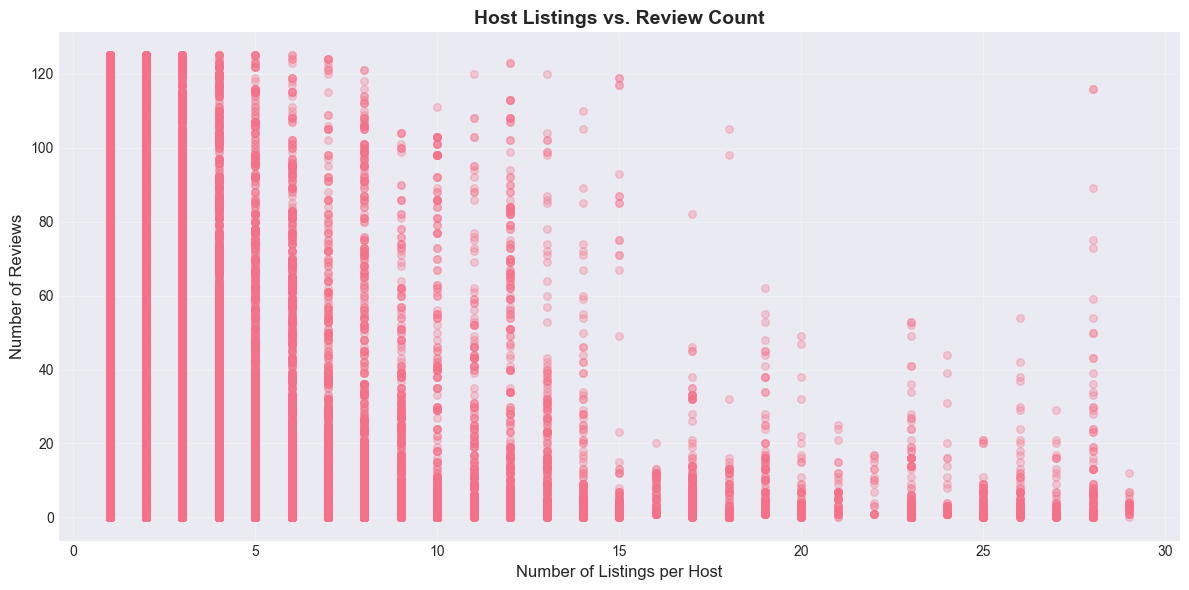


Correlation between host listings and reviews: -0.009


In [25]:
if review_num_col and host_listings_col:
    review_col = review_num_col[0]
    listings_col = host_listings_col[0]
    
    valid_data = df[[listings_col, review_col]].dropna()
    valid_data = valid_data[
        (valid_data[listings_col] <= valid_data[listings_col].quantile(0.95)) &
        (valid_data[review_col] <= valid_data[review_col].quantile(0.95))
    ]
    
    plt.figure(figsize=(12, 6))
    plt.scatter(valid_data[listings_col], valid_data[review_col], alpha=0.3, s=30)
    plt.xlabel('Number of Listings per Host', fontsize=12)
    plt.ylabel('Number of Reviews', fontsize=12)
    plt.title('Host Listings vs. Review Count', fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    correlation = valid_data[listings_col].corr(valid_data[review_col])
    print(f"\nCorrelation between host listings and reviews: {correlation:.3f}")

### 7.3 Top Performing Hosts

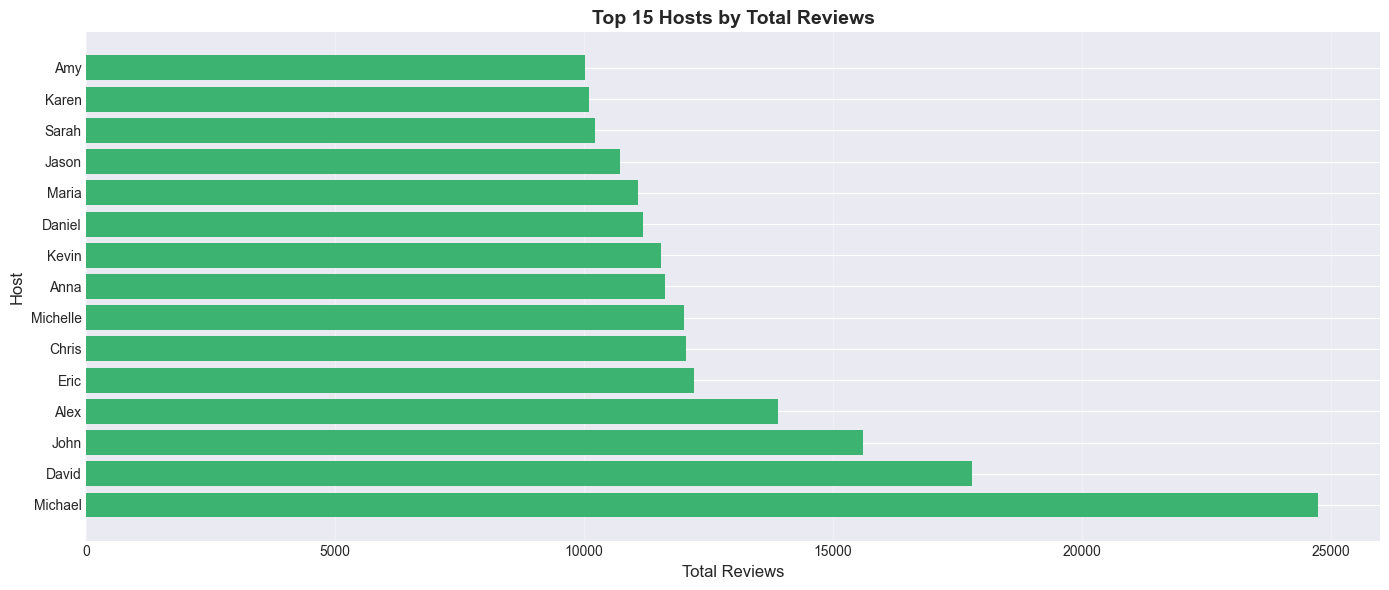


Top 15 performing hosts:
host name
Michael     24749.0
David       17789.0
John        15591.0
Alex        13902.0
Eric        12198.0
Chris       12053.0
Michelle    12005.0
Anna        11613.0
Kevin       11533.0
Daniel      11179.0
Maria       11074.0
Jason       10724.0
Sarah       10214.0
Karen       10099.0
Amy         10006.0
Name: number of reviews, dtype: float64


In [26]:
host_name_col = [col for col in host_cols if 'name' in col.lower()]

if host_name_col and review_num_col:
    host_col = host_name_col[0]
    review_col = review_num_col[0]
    
    top_hosts = df.groupby(host_col)[review_col].sum().sort_values(ascending=False).head(15)
    
    plt.figure(figsize=(14, 6))
    plt.barh(range(len(top_hosts)), top_hosts.values, color='mediumseagreen')
    plt.yticks(range(len(top_hosts)), top_hosts.index)
    plt.xlabel('Total Reviews', fontsize=12)
    plt.ylabel('Host', fontsize=12)
    plt.title('Top 15 Hosts by Total Reviews', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\nTop 15 performing hosts:")
    print(top_hosts)

### 7.4 Host Type Performance Comparison

In [27]:
if rating_cols and host_listings_col:
    listings_col = host_listings_col[0]
    
    df['host_type'] = df[listings_col].apply(lambda x: 'Single-listing' if x == 1 else 'Multi-listing')
    
    for rating_col in rating_cols[:1]:
        if df[rating_col].dtype in ['int64', 'float64']:
            rating_by_host_type = df.groupby('host_type')[rating_col].mean()
            
            plt.figure(figsize=(10, 6))
            plt.bar(rating_by_host_type.index, rating_by_host_type.values, color=['steelblue', 'darkorange'])
            plt.ylabel(f'Average {rating_col}', fontsize=12)
            plt.xlabel('Host Type', fontsize=12)
            plt.title(f'Average {rating_col} by Host Type', fontsize=14, fontweight='bold')
            plt.grid(axis='y', alpha=0.3)
            plt.tight_layout()
            plt.show()
            
            print(f"\nAverage {rating_col} comparison:")
            print(rating_by_host_type)
            break

In [28]:
if response_rate_cols and host_listings_col and 'host_type' in df.columns:
    response_col = None
    for resp_col in response_rate_cols:
        if 'clean' in resp_col or df[resp_col].dtype in ['int64', 'float64']:
            response_col = resp_col
            break
    
    if response_col:
        response_by_host_type = df.groupby('host_type')[response_col].mean()
        
        plt.figure(figsize=(10, 6))
        plt.bar(response_by_host_type.index, response_by_host_type.values, color=['steelblue', 'coral'])
        plt.ylabel('Average Response Rate (%)', fontsize=12)
        plt.xlabel('Host Type', fontsize=12)
        plt.title('Host Responsiveness by Type', fontsize=14, fontweight='bold')
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print(f"\nHost responsiveness comparison:")
        print(response_by_host_type)

### 7.5 Reviews per Month Analysis (Indicator of Host Activity)

Reviews per month columns found: ['reviews per month']


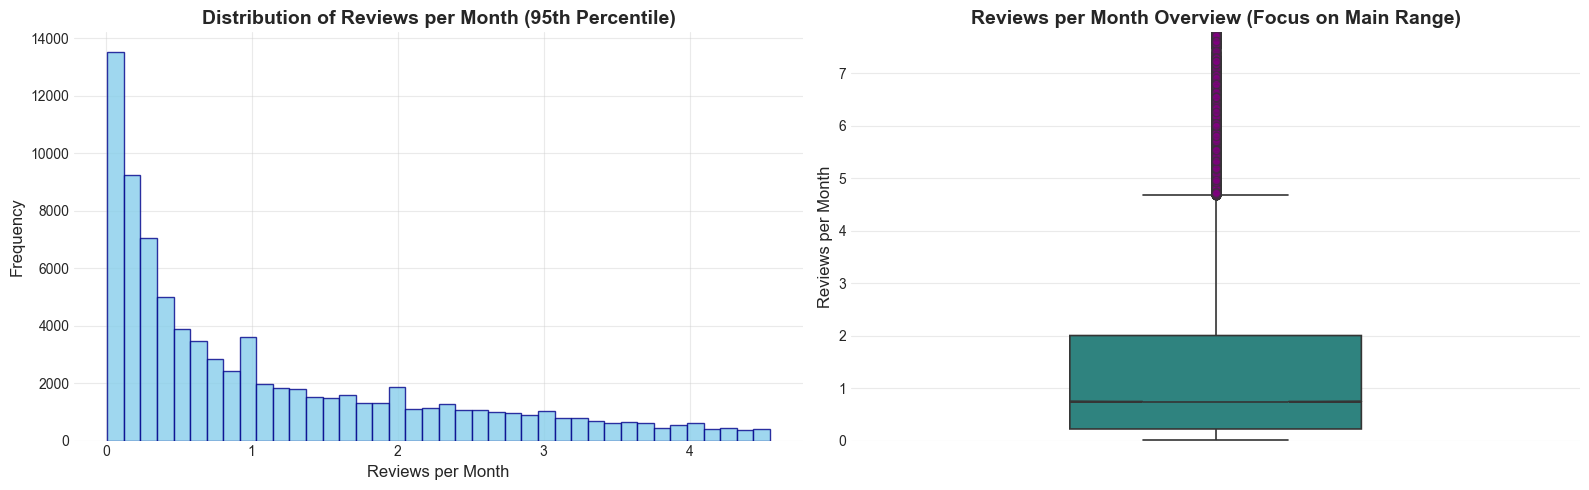


Reviews per Month Statistics (indicator of host activity):
count    86720.000000
mean         1.374022
std          1.746621
min          0.010000
25%          0.220000
50%          0.740000
75%          2.000000
max         90.000000
Name: reviews per month, dtype: float64

Host activity level distribution:
host_activity_level
Low (0-1)          49047
Medium (1-3)       25256
High (3-10)        12223
Very High (>10)      194
Name: count, dtype: int64


In [42]:
reviews_per_month_cols = [col for col in df.columns if 'reviews' in col.lower() and 'month' in col.lower()]
print("Reviews per month columns found:", reviews_per_month_cols)

if reviews_per_month_cols:
    rpm_col = reviews_per_month_cols[0]
    
    rpm_plot_data = df[rpm_col].dropna()
    rpm_plot_data = rpm_plot_data[rpm_plot_data > 0]

    rpm_hist_data = rpm_plot_data[rpm_plot_data <= rpm_plot_data.quantile(0.95)]
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    sns.set_style("whitegrid")

    axes[0].hist(rpm_hist_data, bins=40, color='skyblue', edgecolor='darkblue', alpha=0.8)
    axes[0].set_xlabel('Reviews per Month', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title('Distribution of Reviews per Month (95th Percentile)', fontsize=14, fontweight='bold')
    axes[0].grid(alpha=0.4)
    
    boxplot_y_limit = rpm_plot_data.quantile(0.99) * 1.1

    sns.boxplot(y=rpm_plot_data, 
                ax=axes[1], 
                palette="viridis", 
                notch=True,
                width=0.4,
                linewidth=1.2,
                flierprops=dict(marker='o', markerfacecolor='purple', markersize=6, alpha=0.6)
               )
    
    axes[1].set_ylabel('Reviews per Month', fontsize=12)
    axes[1].set_title('Reviews per Month Overview (Focus on Main Range)', fontsize=14, fontweight='bold')
    axes[1].set_ylim(0, boxplot_y_limit)
    axes[1].grid(alpha=0.4)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nReviews per Month Statistics (indicator of host activity):")
    print(df[rpm_col].describe())
    
    df['host_activity_level'] = pd.cut(df[rpm_col], 
                                     bins=[0, 1, 3, 10, df[rpm_col].max() + 1], 
                                     labels=['Low (0-1)', 'Medium (1-3)', 'High (3-10)', 'Very High (>10)'],
                                     right=False)
    
    activity_dist = df['host_activity_level'].value_counts()
    print("\nHost activity level distribution:")
    print(activity_dist)

## 8. Summary and Key Insights

In [30]:
print("=" * 80)
print("AIRBNB DATA ANALYSIS - KEY INSIGHTS SUMMARY")
print("=" * 80)

print("\n1. BOOKING PATTERNS:")
print("-" * 40)
if 'review_month' in df.columns:
    peak_month = df['review_month'].value_counts().idxmax()
    month_names = ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    # Correction: Convert peak_month to an integer (int()) before indexing
    print(f"   - Peak booking month: {month_names[int(peak_month)]}")
if 'booking_lead_time_days' in df.columns:
    median_lead = df['booking_lead_time_days'].median()
    print(f"   - Median booking lead time: {median_lead:.0f} days")
if 'minimum nights' in df.columns:
    avg_min_nights = df['minimum nights'].mean()
    print(f"   - Average minimum stay: {avg_min_nights:.1f} nights")
if location_cols:
    top_location = df[location_cols[0]].value_counts().idxmax()
    print(f"   - Most popular location: {top_location}")

print("\n2. PRICING STRATEGIES:")
print("-" * 40)
if 'price_clean' in df.columns:
    avg_price = df['price_clean'].mean()
    median_price = df['price_clean'].median()
    print(f"   - Average listing price: ${avg_price:.2f}")
    print(f"   - Median listing price: ${median_price:.2f}")
    price_range = df['price_clean'].quantile(0.75) - df['price_clean'].quantile(0.25)
    print(f"   - Interquartile price range: ${price_range:.2f}")

print("\n3. GUEST PREFERENCES:")
print("-" * 40)
if room_type_col:
    most_popular_room = df[room_type_col[0]].value_counts().idxmax()
    print(f"   - Most popular room type: {most_popular_room}")
if review_num_col:
    avg_reviews = df[review_num_col[0]].mean()
    print(f"   - Average reviews per listing: {avg_reviews:.1f}")
if availability_col:
    avg_avail = df[availability_col[0]].mean()
    print(f"   - Average availability: {avg_avail:.1f} days")

print("\n4. HOST PERFORMANCE:")
print("-" * 40)
if response_rate_cols:
    resp_col_clean = [c for c in df.columns if 'response' in c.lower() and ('clean' in c.lower() or df[c].dtype in ['int64', 'float64'])]
    if resp_col_clean:
        avg_response = df[resp_col_clean[0]].mean()
        print(f"   - Average host response rate: {avg_response:.1f}%")
if host_listings_col:
    single_listing_hosts = (df[host_listings_col[0]] == 1).sum()
    total_listings = len(df)
    pct_single = (single_listing_hosts / total_listings) * 100
    print(f"   - Single-listing hosts: {pct_single:.1f}%")
    avg_listings = df[host_listings_col[0]].mean()
    print(f"   - Average listings per host: {avg_listings:.1f}")
if reviews_per_month_cols:
    avg_rpm = df[reviews_per_month_cols[0]].mean()
    print(f"   - Average reviews per month (activity): {avg_rpm:.2f}")

print("\n" + "=" * 80)
print("Analysis completed successfully!")
print("=" * 80)

AIRBNB DATA ANALYSIS - KEY INSIGHTS SUMMARY

1. BOOKING PATTERNS:
----------------------------------------
   - Peak booking month: Jun
   - Average minimum stay: 8.2 nights
   - Most popular location: Manhattan

2. PRICING STRATEGIES:
----------------------------------------
   - Average listing price: $625.29
   - Median listing price: $624.00
   - Interquartile price range: $573.00

3. GUEST PREFERENCES:
----------------------------------------
   - Most popular room type: Entire home/apt
   - Average reviews per listing: 27.5
   - Average availability: 141.8 days

4. HOST PERFORMANCE:
----------------------------------------
   - Single-listing hosts: 61.8%
   - Average listings per host: 7.9
   - Average reviews per month (activity): 1.37

Analysis completed successfully!
